In [380]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Load the dataset as a DataFrame
data = pd.read_csv("Clustering_Data.csv")

# Drop the 'Customer_Segment' column to get features
x = data.drop(['Customer_Segment'], axis=1)

# Target variable
y = data['Customer_Segment'].values

# List of features to ensure consistency
features = ["Alcohol", "Malic_Acid", "Ash", "Ash_Alcanity", "Magnesium",
            "Total_Phenols", "Flavanoids", "Nonflavanoid_Phenols", 
            "Proanthocyanins", "Color_Intensity", "Hue", "OD280", "Proline"]

# Drop rows with missing values in the selected features
x = x.dropna(subset=features)

# Select only the desired features and copy to a new DataFrame
datano = x[features].copy()

# Normalize the data using Min-Max normalization
datano = (datano - datano.min()) / (datano.max() - datano.min())

# Display summary statistics of the normalized data
print(datano.head())
print(datano.describe())




    Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  0.842105    0.191700  0.572193      0.257732   0.619565       0.627586   
1  0.571053    0.205534  0.417112      0.030928   0.326087       0.575862   
2  0.560526    0.320158  0.700535      0.412371   0.336957       0.627586   
3  0.878947    0.239130  0.609626      0.319588   0.467391       0.989655   
4  0.581579    0.365613  0.807487      0.536082   0.521739       0.627586   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    0.573840              0.283019         0.593060         0.372014   
1    0.510549              0.245283         0.274448         0.264505   
2    0.611814              0.320755         0.757098         0.375427   
3    0.664557              0.207547         0.558360         0.556314   
4    0.495781              0.490566         0.444795         0.259386   

        Hue     OD280   Proline  
0  0.455285  0.970696  0.561341  
1  0.463415  0.780220  0.55064

In [ ]:
# Function to generate random centroids
#we are free to use different values of k
def random_centroids(datan, k):
    centroids = []
    for i in range(k):
        centroids_row = datan.apply(lambda x: float(x.sample()))  # Corrected sample usage
        centroids.append(centroids_row)  # Append the row to the list
    return pd.concat(centroids, axis=1)  # Concatenate rows into a DataFrame
centroids = random_centroids(datano, 5)
print(centroids)



                             0         1         2         3         4
Alcohol               0.671053  0.807895  0.255263  0.644737  0.276316
Malic_Acid            0.215415  0.705534  0.480237  0.071146  0.620553
Ash                   0.668449  0.299465  0.994652  0.529412  0.689840
Ash_Alcanity          0.432990  0.432990  0.175258  0.716495  0.432990
Magnesium             0.108696  0.282609  0.195652  0.391304  1.000000
Total_Phenols         0.282759  0.575862  0.327586  0.827586  0.351724
Flavanoids            0.599156  0.445148  0.244726  0.411392  0.487342
Nonflavanoid_Phenols  0.547170  0.452830  0.320755  0.245283  0.905660
Proanthocyanins       0.593060  0.804416  0.485804  0.205047  0.173502
Color_Intensity       0.616041  0.206485  0.197952  0.259386  0.506826
Hue                   0.479675  0.455285  0.487805  0.357724  0.097561
OD280                 0.542125  0.699634  0.703297  0.586081  0.553114
Proline               0.247504  0.835949  0.336662  0.136947  0.122682


C:\Users\mahek\AppData\Local\Temp\ipykernel_2876\2398204156.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroids_row = datan.apply(lambda x: float(x.sample()))  # Corrected sample usage


In [382]:
# Function to assign labels to data points based on nearest centroid
def get_labels(datan, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((datan - x) ** 2).sum(axis=1)), axis=0)
    print(distances)
    return distances.idxmin(axis=1)  # Find the index of the minimum distance for each data point
labels = get_labels(datano, centroids)
print(labels)
labels.value_counts()





            0         1         2         3         4
0    0.928668  0.867675  1.075730  0.941538  1.361452
1    0.917069  0.950276  0.886556  0.899110  1.368818
2    0.718435  0.698874  0.842218  0.937057  1.349148
3    1.131223  0.927304  1.327895  1.060237  1.591398
4    0.724023  0.948643  0.767295  0.654277  0.983358
..        ...       ...       ...       ...       ...
173  1.167606  1.275118  1.247651  1.387528  1.127838
174  0.956511  1.189640  1.104502  1.098089  1.072327
175  1.105929  1.296048  1.270801  1.305834  1.010034
176  0.990134  1.322709  1.227325  1.201943  0.951393
177  1.042346  1.382467  1.322428  1.239678  1.138058

[178 rows x 5 columns]
0      1
1      2
2      1
3      1
4      3
      ..
173    4
174    0
175    4
176    4
177    0
Length: 178, dtype: int64


3    63
0    59
2    27
1    20
4     9
Name: count, dtype: int64

In [383]:
# Function to calculate new centroids
#def new_centroids(datan, labels, k):
    #return datan.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
# Function to calculate new centroids
def new_centroids(data, labels, k):
    return data.groupby(labels).mean().T


In [384]:


# PCA class for dimensionality reduction
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # Covariance matrix
        cov = np.cov(X.T)

        # Eigenvectors and eigenvalues
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        # Eigenvectors transformed for easier calculations
        eigenvectors = eigenvectors.T

        # Sort eigenvectors by eigenvalues in descending order
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # Select top n_components
        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        # Project the data
        X = X - self.mean
        return np.dot(X, self.components.T)


# Function to plot clusters
def plot_clusters(data, labels, centroids, iterations):
    pca = PCA(n_components=2)
    pca.fit(data)
    data_2d = pca.transform(data)
    centroids_2d = pca.transform(centroids.T)

    clear_output(wait=True)
    plt.title(f'Iterations {iterations}')
    plt.scatter(x=data_2d[:, 0], y=data_2d[:, 1], c=labels)
    plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1], color='red', marker='x')
    plt.show()





In [385]:
# Function to compute the sum of squared distances (inertia)
def compute_inertia(data, labels, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    min_distances = distances.min(axis=1)
    return np.sum(min_distances ** 2)


C:\Users\mahek\AppData\Local\Temp\ipykernel_2876\2398204156.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroids_row = datan.apply(lambda x: float(x.sample()))  # Corrected sample usage


               0
0     637.716977
1     622.056119
2     757.016056
3    1052.124327
4     307.756321
..           ...
173   312.053776
174   322.096549
175   407.678517
176   412.659005
177   132.217782

[178 rows x 1 columns]


              0
0    319.306670
1    303.225506
2    438.115070
3    733.242531
4     21.902922
..          ...
173    9.703989
174    6.239507
175   90.600661
176   95.405093
177  187.066461

[178 rows x 1 columns]
              0            1
0     22.348000   650.529938
1     17.519723   635.035689
2    120.089303   770.008552
3    415.096000  1065.078092
4    330.272997   320.490747
..          ...          ...
173  325.204373   325.102775
174  315.074548   335.069340
175  230.571973   420.475322
176  225.559047   425.457278
177  505.144854   145.352921

[178 rows x 2 columns]
              0           1
0     20.627912  534.840977
1     24.264635  518.934153
2    113.241073  653.856187
3    408.072939  949.014990
4    337.146136  205.184683
..          ...         ...
173  332.269570  208.867106
174  322.090103  218.982917
175  237.374928  304.947731
176  232.356914  309.909382
177  512.176913   29.576424

[178 rows x 2 columns]
              0           1
0     55.321916  516.646

C:\Users\mahek\AppData\Local\Temp\ipykernel_2876\2398204156.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroids_row = datan.apply(lambda x: float(x.sample()))  # Corrected sample usage
C:\Users\mahek\AppData\Local\Temp\ipykernel_2876\2398204156.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroids_row = datan.apply(lambda x: float(x.sample()))  # Corrected sample usage
C:\Users\mahek\AppData\Local\Temp\ipykernel_2876\2398204156.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroids_row = datan.apply(lambda x: float(x.sample()))  # Corrected sample usage


              0           1            2
0    126.426012  358.845168   622.592037
1    140.062955  343.026086   606.718852
2      7.679421  477.909140   741.651271
3    290.309107  773.002332  1036.817960
4    454.931714   32.492386   292.732425
..          ...         ...          ...
173  449.971686   33.803470   296.649052
174  439.858474   43.087754   306.778730
175  355.089887  129.332598   392.628553
176  350.075939  134.238749   397.598212
177  629.929424  147.340133   116.854007

[178 rows x 3 columns]
              0           1            2
0    131.922635  344.237134   613.459136
1    145.379823  328.494804   597.582724
2     11.287414  463.368202   732.514015
3    284.960394  758.438565  1027.680327
4    460.338932   20.286881   283.613478
..          ...         ...          ...
173  455.318860   20.427026   287.514343
174  445.225174   28.651190   297.642506
175  360.508362  114.744425   383.503002
176  355.495407  119.641747   388.471679
177  635.287682  161.916884   107

C:\Users\mahek\AppData\Local\Temp\ipykernel_2876\2398204156.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroids_row = datan.apply(lambda x: float(x.sample()))  # Corrected sample usage


              0           1           2            3            4
0     51.863345  226.916150  215.730175   720.564912   585.010982
1     22.581466  240.113073  230.321950   705.055740   570.664040
2    150.895383  105.152552   95.529007   840.011018   705.494074
3    445.921675  190.694890  200.107947  1135.101175  1000.108113
4    301.829818  555.381689  545.082711   390.479412   255.244524
..          ...         ...         ...          ...          ...
173  295.268050  550.067748  540.240615   395.068730   262.098995
174  285.606739  540.077972  530.107203   405.051710   271.319002
175  203.226683  455.622156  445.167526   490.498023   355.171437
176  198.258795  450.604836  440.158058   495.475221   360.149752
177  475.228772  730.077651  720.196590   215.165703    86.531861

[178 rows x 5 columns]
              0           1           2            3           4
0    104.855413  345.560662  181.905538   704.054984  483.152799
1     88.761097  359.839688  196.315126   688.155974  

C:\Users\mahek\AppData\Local\Temp\ipykernel_2876\2398204156.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroids_row = datan.apply(lambda x: float(x.sample()))  # Corrected sample usage
C:\Users\mahek\AppData\Local\Temp\ipykernel_2876\2398204156.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroids_row = datan.apply(lambda x: float(x.sample()))  # Corrected sample usage


              0           1           2           3           4           5
0    505.222829  382.021587  196.775226  445.153337  546.642023   93.423457
1    488.482939  365.245870  210.060265  430.360149  530.239961  101.283874
2    623.369314  500.189432   75.186559  565.210599  665.225358   37.326590
3    918.616177  795.418360  220.410730  860.014254  960.438272  330.949437
4    177.163138   58.558309  525.319091  115.128314  217.644711  416.023663
..          ...         ...         ...         ...         ...         ...
173  178.750720   56.028838  520.101896  121.918863  220.415172  410.079064
174  189.392479   67.094312  510.088258  130.896772  230.850034  400.226576
175  276.026898  153.660367  425.519045  215.094431  317.102291  316.587591
176  280.940861  158.498038  420.506216  220.076851  322.038481  311.591707
177   18.359766  125.763605  700.114698   63.732417   43.311710  590.065815

[178 rows x 6 columns]
              0           1           2           3            4

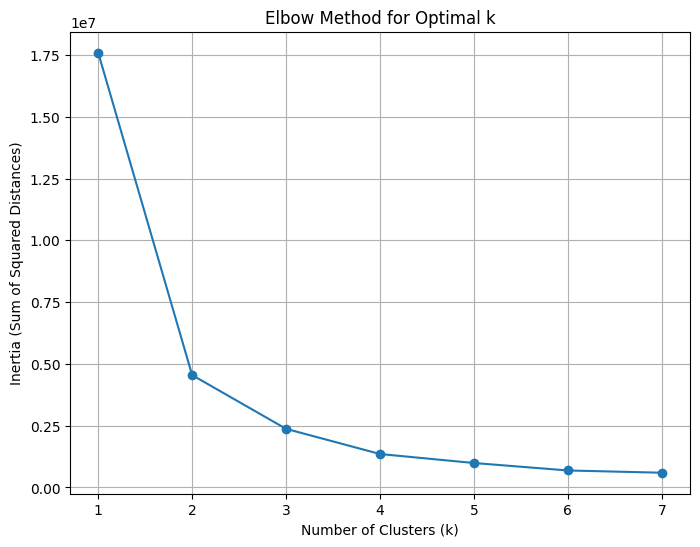

In [386]:
# Parameters for clustering
max_iterations = 100
# Elbow method: Try different values of k
k_values = range(1, 8)
inertia_values = []

for k in k_values:
    centroids = random_centroids(data, k)
    old_centroids = pd.DataFrame()
    iteration = 1

    # K-means clustering loop
    while iteration < max_iterations and not centroids.equals(old_centroids):
        old_centroids = centroids
        labels = get_labels(data, centroids)
        centroids = new_centroids(data, labels, k)
        iteration += 1
    
    # Compute and store the inertia (sum of squared distances)
    inertia = compute_inertia(data, labels, centroids)
    inertia_values.append(inertia)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()


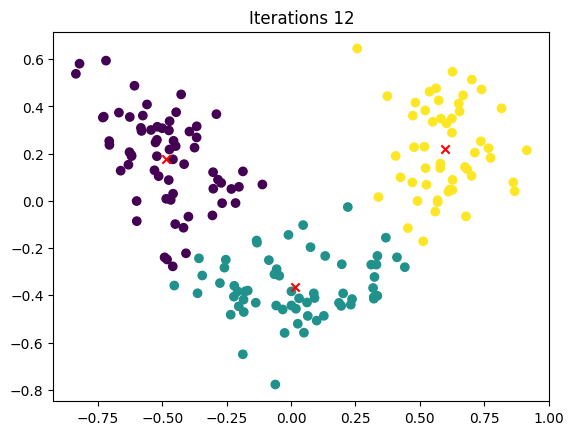

In [387]:
# Initialize centroids and start iterations
k=3
centroids = random_centroids(datano, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    labels = get_labels(datano, centroids)
    centroids = new_centroids(datano, labels, k)
    plot_clusters(datano, labels, centroids, iteration)
    iteration += 1

In [388]:
print(centroids)

                             0         1         2
Alcohol               0.691296  0.308616  0.553715
Malic_Acid            0.238370  0.238493  0.507363
Ash                   0.576306  0.475850  0.565587
Ash_Alcanity          0.352657  0.495427  0.548514
Magnesium             0.397659  0.254909  0.311594
Total_Phenols         0.649867  0.420968  0.242732
Flavanoids            0.554852  0.358378  0.101018
Nonflavanoid_Phenols  0.291147  0.451004  0.607473
Proanthocyanins       0.477554  0.377887  0.232140
Color_Intensity       0.348267  0.142436  0.508081
Hue                   0.480801  0.468607  0.172326
OD280                 0.688250  0.560853  0.156288
Proline               0.572117  0.160278  0.243266
